In [ ]:
# !unzip -q shape.zip
# !rm -r ~/.kaggle
# !mkdir ~/.kaggle
# !mv ./kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download smeschke/four-shapes
# !unzip four-shapes.zip

In [ ]:
!unzip -q dataset.zip
!unzip -q test.zip

In [ ]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Kami Mengambil gambar dari computer dengan mengupload file kami kedalam collab

In [ ]:
val_path="/content/3"
train_path="/content/3"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(100, 100),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(100, 100),
                                                              shuffle=False,
                                                              batch_size=32)

Found 232 files belonging to 4 classes.
Found 232 files belonging to 4 classes.


kami menggunakan preprocessing image dari tensorflow untuk mengolah data image nya

untuk mengambil label nama dari dataset dengan mengambil dari nama folder dimana data set di letakan 

In [ ]:
class_names = train_dataset.class_names
print(len(class_names))
print(class_names)

4
['circle', 'square', 'star', 'triangle']


kami membuat modelnya dengan menggunakan aktifasi nya relu dan ukuran layer yang semakin besar setiap layer nya

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))


In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


setelah data dicompile model bisa di training

kita training model kami sebanyak 50 kali

In [ ]:
history = model.fit(x=train_dataset,
                    epochs= 50,
                    validation_data=val_dataset)

Epoch 1/50
8/8 [==============================] - 2s 126ms/step - loss: 1.4653 - accuracy: 0.4009 - val_loss: 5.6058 - val_accuracy: 0.2328
Epoch 2/50
8/8 [==============================] - 1s 57ms/step - loss: 0.5498 - accuracy: 0.7759 - val_loss: 4.5803 - val_accuracy: 0.2802
Epoch 3/50
8/8 [==============================] - 1s 59ms/step - loss: 0.3869 - accuracy: 0.8707 - val_loss: 2.7566 - val_accuracy: 0.4612
Epoch 4/50
8/8 [==============================] - 1s 55ms/step - loss: 0.1906 - accuracy: 0.9353 - val_loss: 2.3805 - val_accuracy: 0.4655
Epoch 5/50
8/8 [==============================] - 0s 53ms/step - loss: 0.1010 - accuracy: 0.9784 - val_loss: 1.6909 - val_accuracy: 0.5043
Epoch 6/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0596 - accuracy: 0.9871 - val_loss: 1.5198 - val_accuracy: 0.5086
Epoch 7/50
8/8 [==============================] - 0s 52ms/step - loss: 0.0550 - accuracy: 0.9914 - val_loss: 1.1381 - val_accuracy: 0.6078
Epoch 8/50
8/8 [==========

In [ ]:
# history = model.fit(x = train_dataset, epochs = 20, validation_data= validation_dataset)

hasil dari loss setelah training

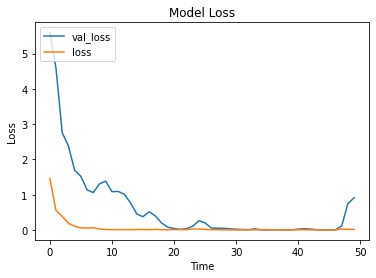

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

hasil accuracy setelah training

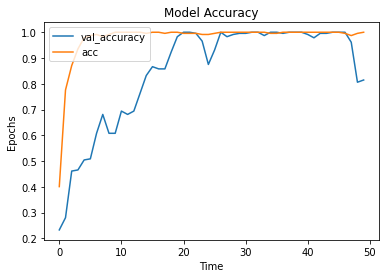

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

kami menguji gambar dari dataset untuk menguji 

In [ ]:
# !unzip -q test.zip

Actual shape: circle
Predicted shape: circle


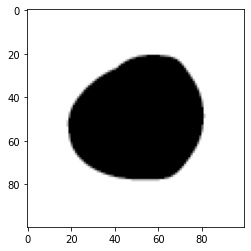

In [ ]:
from keras_preprocessing import image
img_path = '/content/test/circle/1.png'
img = image.load_img(img_path, target_size = (100, 100, 3))

plt.imshow(img)

x = image.img_to_array(img=img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, 32)

label = np.argmax(pred, axis = 1)
print('Actual shape: ' + img_path.split('/')[-2])
print('Predicted shape: '+class_names[np.argmax(pred)])


untu img atau gambar dari data set sudah benar

coba kita test dengan gambar yang kita gambar sendiri

Actual shape: square
Predicted shape: square


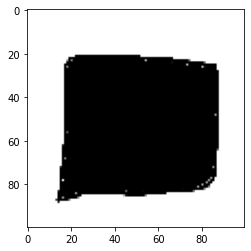

In [ ]:
from keras_preprocessing import image
img_path = '/content/test/square/1.png'
img = image.load_img(img_path, target_size = (100, 100, 3))
plt.imshow(img)

x = image.img_to_array(img=img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, 32)

label = np.argmax(pred, axis = 1)
print('Actual shape: ' + img_path.split('/')[-2])
print('Predicted shape: '+class_names[np.argmax(pred)])


Actual shape: star
Predicted shape: triangle


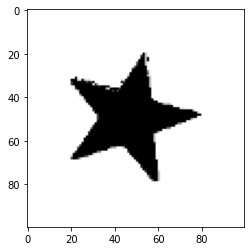

In [ ]:
from keras_preprocessing import image
img_path = '/content/test/star/241.png'
img = image.load_img(img_path, target_size = (100, 100, 3))
plt.imshow(img)

x = image.img_to_array(img=img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, 32)

label = np.argmax(pred, axis = 1)
print('Actual shape: ' + img_path.split('/')[-2])
print('Predicted shape: '+class_names[np.argmax(pred)])


Actual shape: triangle
Predicted shape: square


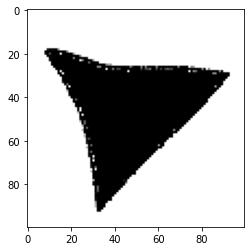

In [ ]:
from keras_preprocessing import image
img_path = '/content/test/triangle/1.png'
img = image.load_img(img_path, target_size = (100, 100, 3))
plt.imshow(img)

x = image.img_to_array(img=img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, 32)

label = np.argmax(pred, axis = 1)
print('Actual shape: ' + img_path.split('/')[-2])
print('Predicted shape: '+class_names[np.argmax(pred)])


Actual shape: circle
Predicted shape: circle


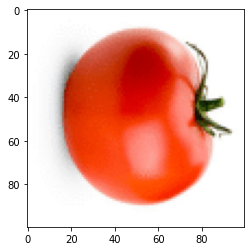

In [ ]:
from keras_preprocessing import image
img_path = '/content/3/circle/6.png'
img = image.load_img(img_path, target_size = (100, 100, 3))
plt.imshow(img)

x = image.img_to_array(img=img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, 32)

label = np.argmax(pred, axis = 1)
print('Actual shape: ' + img_path.split('/')[-2])
print('Predicted shape: '+class_names[np.argmax(pred)])

Actual shape: triangle
Predicted shape: triangle


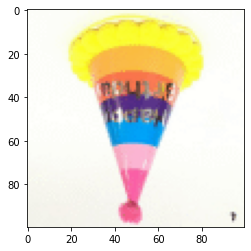

In [ ]:
from keras_preprocessing import image
img_path = '/content/3/triangle/6.png'
img = image.load_img(img_path, target_size = (100, 100, 3))
plt.imshow(img)

x = image.img_to_array(img=img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, 32)

label = np.argmax(pred, axis = 1)
print('Actual shape: ' + img_path.split('/')[-2])
print('Predicted shape: '+class_names[np.argmax(pred)])

Actual shape: square
Predicted shape: square


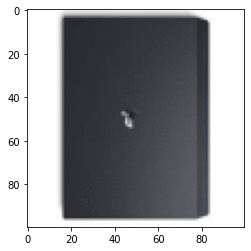

In [ ]:
from keras_preprocessing import image
img_path = '/content/3/square/6.png'
img = image.load_img(img_path, target_size = (100, 100, 3))
plt.imshow(img)

x = image.img_to_array(img=img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, 32)

label = np.argmax(pred, axis = 1)
print('Actual shape: ' + img_path.split('/')[-2])
print('Predicted shape: '+class_names[np.argmax(pred)])

Actual shape: star
Predicted shape: star


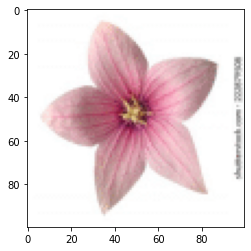

In [ ]:
from keras_preprocessing import image
img_path = '/content/3/star/6.png'
img = image.load_img(img_path, target_size = (100, 100, 3))
plt.imshow(img)

x = image.img_to_array(img=img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, 32)

label = np.argmax(pred, axis = 1)
print('Actual shape: ' + img_path.split('/')[-2])
print('Predicted shape: '+class_names[np.argmax(pred)])

ternyata ada shape yang tidak terdeteksi dengan mesin,

mesin tidak selalu tepat tetapi bisa di latih untuk mendekatkan dengan accuracy hampir sempurna